# Cart Algortihm

In [40]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
import os

C:\Users\gipas\AppData\Local\Temp\ipykernel_10744\3110734164.py:6: DtypeWarning: Columns (123,144) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../data/final_data/train/train_part1.csv')


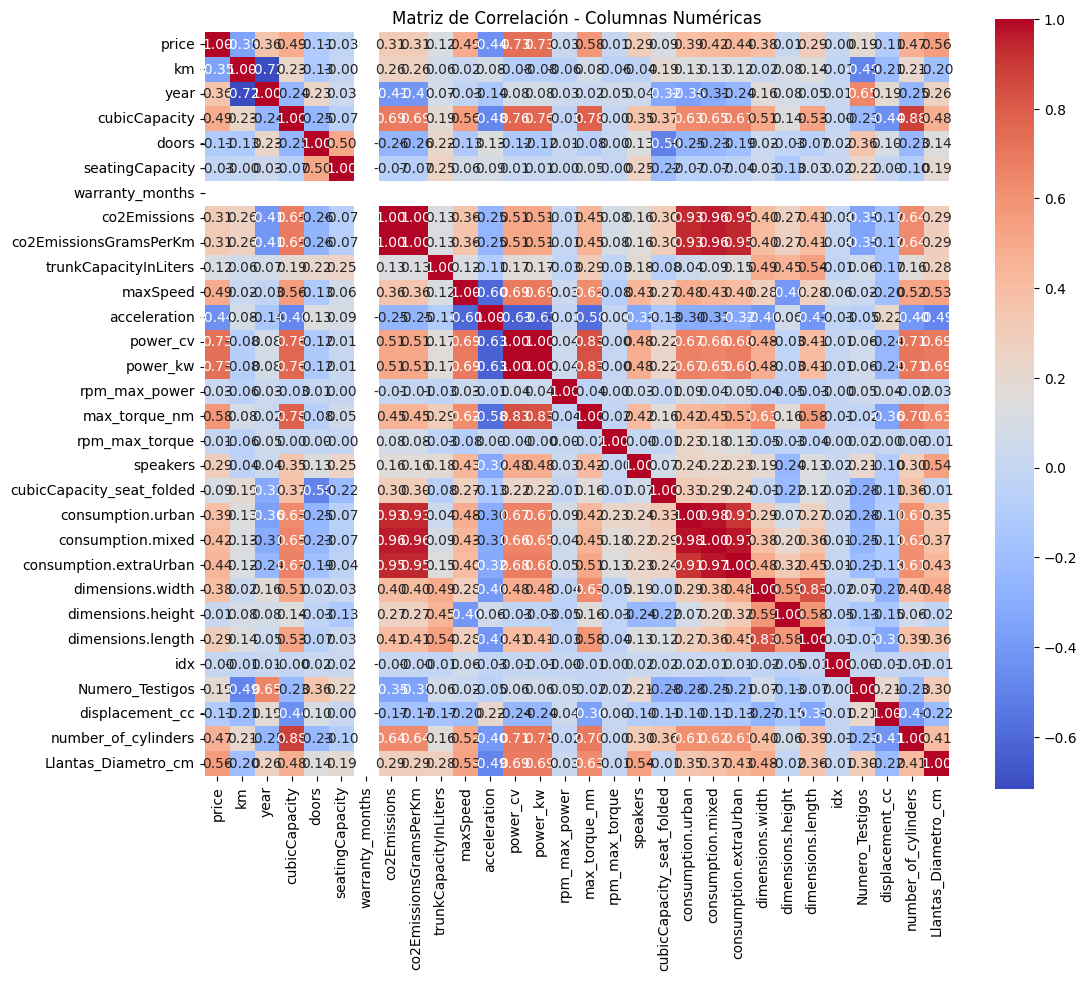

price                        1.000000
power_kw                     0.726511
power_cv                     0.726411
max_torque_nm                0.584208
Llantas_Diametro_cm          0.559532
maxSpeed                     0.490638
cubicCapacity                0.489901
number_of_cylinders          0.469679
consumption.extraUrban       0.439095
consumption.mixed            0.415045
consumption.urban            0.389353
dimensions.width             0.384935
year                         0.357322
co2EmissionsGramsPerKm       0.309877
co2Emissions                 0.309837
speakers                     0.293856
dimensions.length            0.289893
Numero_Testigos              0.190417
trunkCapacityInLiters        0.115173
cubicCapacity_seat_folded    0.094998
rpm_max_power                0.026175
dimensions.height            0.008097
rpm_max_torque               0.005629
idx                         -0.004650
seatingCapacity             -0.028103
displacement_cc             -0.110891
doors       

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tus datos
df_train = pd.read_csv('../data/final_data/train/train_part1.csv')

# Filtrar solo las columnas numéricas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación - Columnas Numéricas')
plt.show()

# Mostrar la correlación específica con la categoría de precio
print(correlation_matrix['price'].sort_values(ascending=False))



Tamaño del conjunto de entrenamiento balanceado: (120560, 23)
Tamaño del conjunto de prueba: (23120, 23)


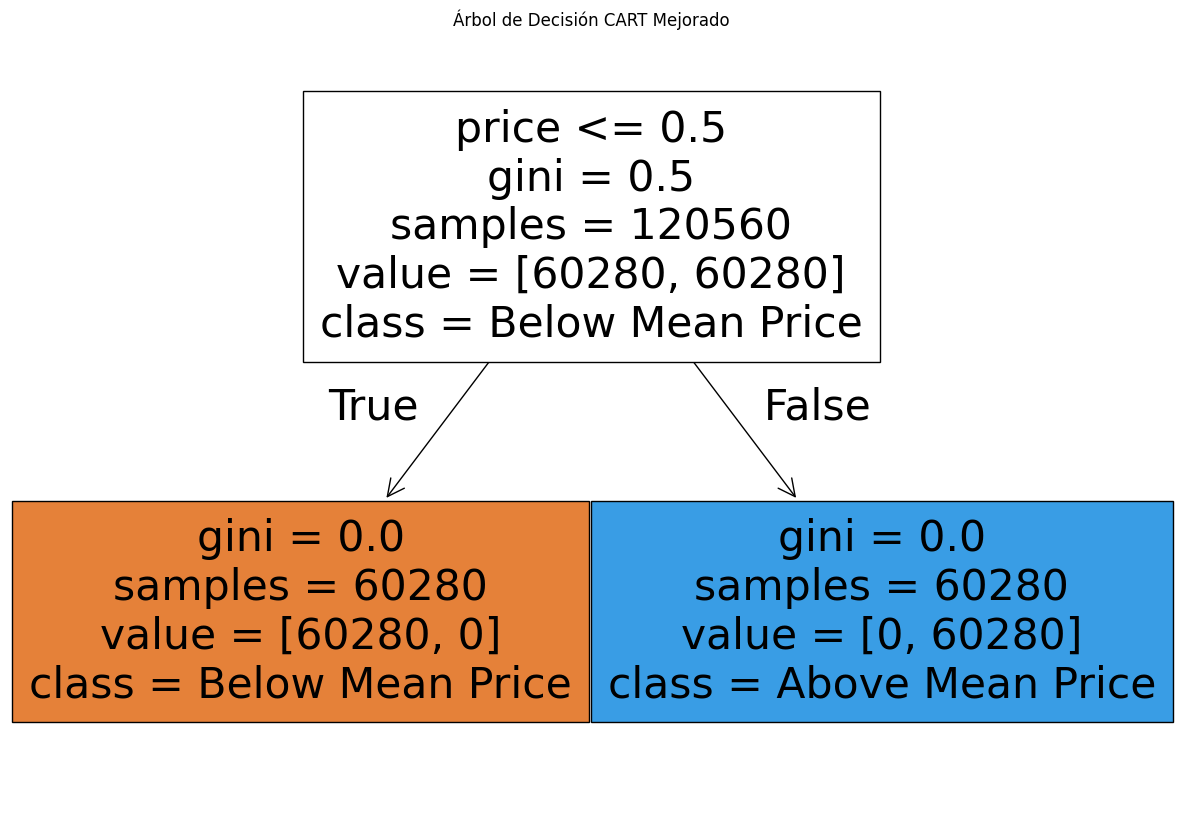

    price        km    year  cubicCapacity  doors  co2Emissions  \
0   22490   68887.0  2020.0         1332.0    5.0         130.0   
1   19990  116892.0  2017.0         1969.0    5.0         104.0   
2   17500  130820.0  2019.0         1560.0    4.0         137.0   
3   22900   50773.0  2020.0         1798.0    5.0          76.0   
4    4000  269000.0  2010.0         1910.0    5.0         149.0   
..    ...       ...     ...            ...    ...           ...   
1   22900   77653.0  2019.0         1598.0    4.0         164.0   
2    4995  157000.0  2004.0         1997.0    2.0         194.0   
3   17490  129000.0  2017.0         1395.0    5.0          89.0   
4   19850  151560.0  2019.0         2191.0    5.0         143.0   
5   59999  108000.0  2017.0         2987.0    5.0         190.0   

    co2EmissionsGramsPerKm  trunkCapacityInLiters  maxSpeed  acceleration  \
0                    130.0                  430.0     193.0          10.5   
1                    104.0               

In [115]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Cargar tus datos
#df_train = pd.read_csv('../data/final_data/train/train_part1.csv')

# Calcular el precio medio
mean_price = df_train['price'].mean()

# Crear la columna price_category
df_train['price_category'] = (df_train['price'] > mean_price).astype(int)  # 1 si está por encima, 0 si está por debajo

# Filtrar solo las columnas numéricas
numeric_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Filtrar las columnas con correlación mayor a 0.1 con respecto al precio
correlation_threshold = 0.1
selected_features = correlation_matrix['price'][abs(correlation_matrix['price']) > correlation_threshold].index.tolist()

# Dividir los datos en características (X) y etiquetas (y)
X = df_train[selected_features].drop('price_category', axis=1)
y = df_train['price_category']

# Manejar valores nulos
X.fillna(X.mean(), inplace=True)  # Rellenar valores nulos con la media

# Convertir a binario las características numéricas
def binarize_features(df):
    return (df > df.mean()).astype(int)  # 1 si es mayor que la media, 0 si es menor o igual

X_binary = binarize_features(X)

# Dividir el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.2, random_state=42)

# Balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Opcional: Mostrar las dimensiones de los conjuntos balanceados
print(f"Tamaño del conjunto de entrenamiento balanceado: {X_train_balanced.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Entrenar el modelo CART con parámetros ajustados
cart_model = DecisionTreeClassifier(max_depth=5, min_samples_split=5, random_state=42)
cart_model.fit(X_train_balanced, y_train_balanced)

# Visualizar el árbol
plt.figure(figsize=(15, 10))
plot_tree(cart_model, feature_names=X.columns, class_names=['Below Mean Price', 'Above Mean Price'], filled=True)
plt.title("Árbol de Decisión CART Mejorado")
plt.show()


print(df_train[selected_features])

In [105]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo CART
cart_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
cart_model.fit(X_train_balanced, y_train_balanced)

# Hacer predicciones en el conjunto de prueba
y_pred = cart_model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

print(f"Precisión del modelo: {accuracy_score(y_test, y_pred):.2f}")


Matriz de confusión:
[[2163    0]
 [   0 1140]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2163
           1       1.00      1.00      1.00      1140

    accuracy                           1.00      3303
   macro avg       1.00      1.00      1.00      3303
weighted avg       1.00      1.00      1.00      3303

Precisión del modelo: 1.00


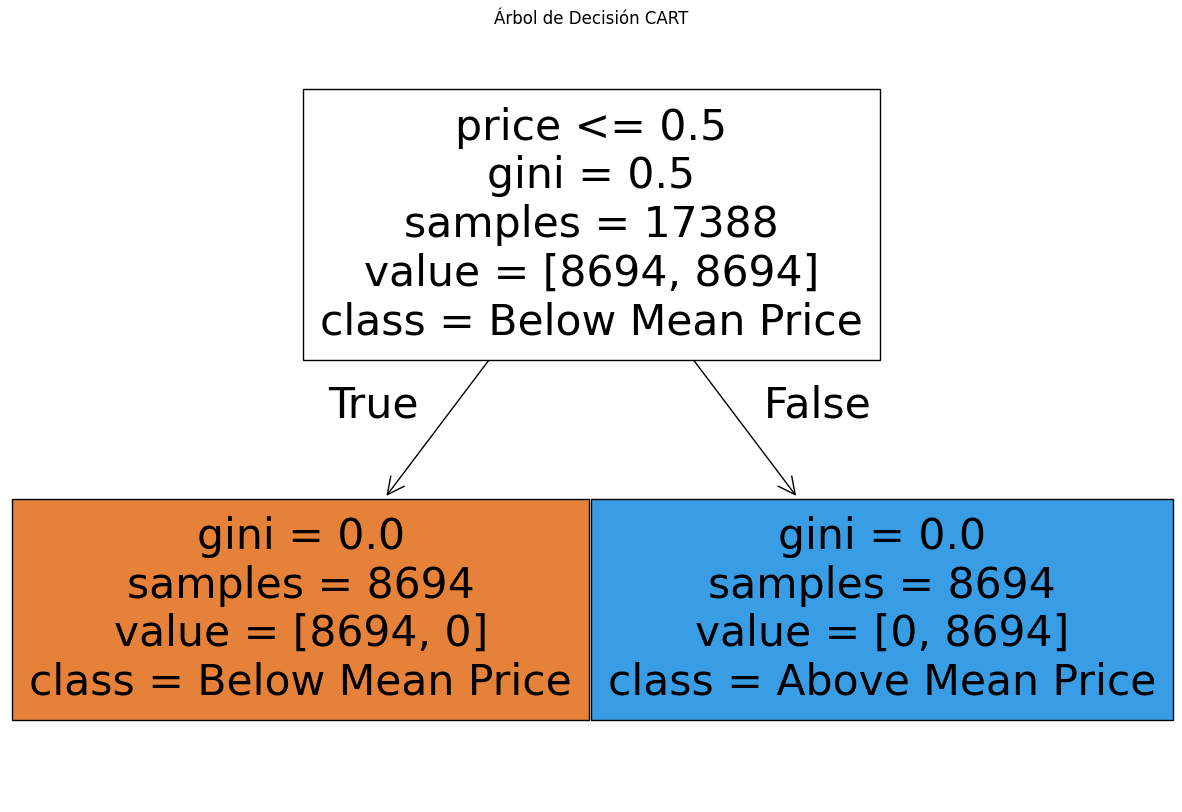

In [112]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Configurar la figura
plt.figure(figsize=(15, 10))

# Dibujar el árbol
plot_tree(cart_model, feature_names=X.columns, class_names=['Below Mean Price', 'Above Mean Price'], filled=True)

# Mostrar el gráfico
plt.title("Árbol de Decisión CART")
plt.show()


In [114]:
# Ruta a los datos
ruta_train = '../data/final_data/train'
ruta_test = '../data/final_data/test'

# Cargar los datasets
df_train = pd.concat([pd.read_csv(os.path.join(ruta_train, file), low_memory=False) for file in os.listdir(ruta_train) if file.endswith('.csv')])
df_test = pd.concat([pd.read_csv(os.path.join(ruta_test, file), low_memory=False) for file in os.listdir(ruta_test) if file.endswith('.csv')])


In [49]:
# Ejemplo de cómo tomar una muestra de 100 filas
df_train_sample = df_train.sample(n=100, random_state=42)
df_test_sample = df_test.sample(n=100, random_state=42)

# Usa df_train_sample y df_test_sample en lugar de df_train y df_test
df_train_sample.head()

,price,km,year,color,cubicCapacity,brand,model,version,fuelType,bodyTypeId,...,electricFeatures.combinedConsumption,electricFeatures.onboardCharger,electricFeatures.standardModeVoltage,electricFeatures.standardModeChargeStart,electricFeatures.standardModeChargeEnd,electricFeatures.fastModeChargeStart,electricFeatures.fastModeVoltage,electricFeatures.standardModeMaxKW,electricFeatures.fastModeAmps,electricFeatures.chargingInformation.standardMode
6715,17990,166000.0,2015.0,Blanco,1995.0,BMW,X3,sDrive18d,Diésel,SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10509,22400,91525.0,2020.0,Azul,1499.0,PEUGEOT,Rifter,Allure Standard BlueHDi 96kW,Diésel,Monovolumen,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8074,7500,130000.0,2018.0,Blanco,1498.0,FORD,Transit Courier,Van 1.5 TDCi 56kW Ambiente,Diésel,Furgoneta,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,18790,76163.0,2022.0,Azul (Surfy blue / phantom black / met),998.0,HYUNDAI,Kona,1.0 TGDI 48V Maxx 4X2,Híbrido,SUV,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13996,24390,33108.0,2022.0,Rojo,1968.0,SEAT,Leon,2.0 TDI 110kW DSG7 SS FR,Diésel,Berlina,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder



# Tomar una muestra de 100 filas
df_train_sample = df_train.sample(n=100, random_state=42)
df_test_sample = df_test.sample(n=100, random_state=42)

# Seleccionar características (X) y etiquetas (y)
# Supongamos que 'price' es la variable objetivo que queremos predecir
X_train = df_train_sample.drop('price', axis=1)
y_train = df_train_sample['price']
X_test = df_test_sample.drop('price', axis=1)
y_test = df_test_sample['price']

# Manejar columnas categóricas
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column].astype(str))
    label_encoders[column] = le

for column in X_test.select_dtypes(include=['object']).columns:
    le = label_encoders[column]
    X_test[column] = X_test[column].astype(str)
    X_test[column] = X_test[column].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)

# Inicializar y entrenar el modelo
cart_model = DecisionTreeClassifier(random_state=42)
cart_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = cart_model.predict(X_test)

# Evaluar el modelo
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))


Matriz de confusión:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Informe de clasificación:
              precision    recall  f1-score   support

        1998       0.00      0.00      0.00       1.0
        1999       0.00      0.00      0.00       1.0
        2900       0.00      0.00      0.00       0.0
        2999       0.00      0.00      0.00       1.0
        3200       0.00      0.00      0.00       0.0
        3700       0.00      0.00      0.00       1.0
        3790       0.00      0.00      0.00       0.0
        4350       0.00      0.00      0.00       1.0
        4500       0.00      0.00      0.00       0.0
        4900       0.00      0.00      0.00       2.0
        4917       0.00      0.00      0.00       1.0
        5500       0.00      0.00      0.00       1.0
        6000       0.00      0.00      0.00       1.0
        6500       0.00      0.00      0.00       0.0
        7490       0.

C:\Users\gipas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gipas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\gipas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:15

In [55]:
from imblearn.over_sampling import SMOTE

# Crear el objeto SMOTE
smote = SMOTE(random_state=42)

# Ajustar y transformar los datos
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Verificar la nueva distribución
print(pd.Series(y_train_balanced).value_counts())


ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [56]:
# Define features and target
features = [
    'km', 'year', 'cubicCapacity', 'brand', 'model', 'version',
    'fuelType', 'bodyTypeId', 'transmissionTypeId', 'doors', 'seatingCapacity',
    'warranty_months', 'province', 'environmentalLabel', 'co2Emissions',
    'co2EmissionsGramsPerKm', 'trunkCapacityInLiters', 'maxSpeed', 'acceleration'
]
target = 'price'

# Filter the columns and convert to string to avoid dtype issues
X_train = df_train[features].astype(str)
y_train = df_train[target]
X_test = df_test[features].astype(str)
y_test = df_test[target]

# Handle missing values by replacing them with 'unknown'
X_train = X_train.fillna('unknown')
X_test = X_test.fillna('unknown')

# Initialize LabelEncoder and encode categorical features
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    
    # Fit on training data and transform
    X_train[column] = le.fit_transform(X_train[column])
    
    # Handle unseen labels in test set
    try:
        X_test[column] = le.transform(X_test[column])
    except ValueError:
        # Replace unseen labels with -1 or any default value
        known_classes = set(le.classes_)
        X_test[column] = X_test[column].apply(lambda x: le.transform([x])[0] if x in known_classes else -1)

    label_encoders[column] = le

# Train the model
modelo_cart = DecisionTreeClassifier(random_state=42)
modelo_cart.fit(X_train, y_train)

# Make predictions on the test set
y_pred = modelo_cart.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(modelo_cart, filled=True, feature_names=features)
plt.title("Árbol de Decisión para el Conjunto de Datos de Coches")
plt.show()

# Display the accuracy
print(f"Precisión del modelo: {accuracy:.2f}")

KeyboardInterrupt: 